In [1]:
import warnings
warnings.filterwarnings('ignore')

import urllib, json
from urllib.request import urlopen
import numpy as np
from io import open
import ast
import time
import requests
import pandas as pd

from IPython.core.display import HTML,display
display(HTML("<style>.container { width:85% !important; }</style>"))

%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


from collections import Counter

In [2]:
w = np.load("um_openalex.npy", allow_pickle=True)

In [3]:
um_staff = {2004:798, 2005:934, 2006: 1022, 2007: 1037, 2008: 1040, 2009: 923, 2010: 865, 2011: 907, 2012: 869, 2013: 860,
            2014: 871, 2015: 889, 2016: 888, 2017: 908, 2018: 915, 2019: 940, 2020: 940, 2021: 960, 2022: 977, 2023: 1004}

In [ ]:
################################## primerjava z WOS ##################################

In [4]:
incites = pd.read_excel("./um_incites.xlsx")

In [5]:
# read in the data from ./um_wos folder containing the data from Web of Science in several xlsx files of the form "um01.xlsx" ... "um21.xlsx"
# and merge them into one dataframe
wos = pd.read_excel("./um_wos/um01.xls")
for i in range(2, 22):
    wos_ = pd.read_excel(f"./um_wos/um{i:02d}.xls")
    wos = pd.concat([wos, wos_])


In [6]:
wos_doi = wos['DOI']
incites_doi = incites['DOI']
incites_doi = incites_doi.dropna()
wos_doi = wos_doi.dropna()
openalex_doi = [work['doi'] for work in w]
#openalex_doi = [work['doi'] for work in lead_um_works]
openalex_doi = [doi for doi in openalex_doi if doi]
openalex_doi = [doi.replace("https://doi.org/", "") for doi in openalex_doi]
# normalize dois to lowercase
wos_doi = wos_doi.str.lower()
incites_doi = incites_doi.str.lower()
openalex_doi = [doi.lower() for doi in openalex_doi]



In [7]:
len(set(openalex_doi) & set(wos_doi))/len(set(wos_doi)), len(set(openalex_doi) & set(incites_doi))/len(set(incites_doi))

(0.8493132417655688, 0.8483942270185931)

In [ ]:
################

In [11]:
author_timelines = {}
for work in w:
    for author in work["authorships"]:
        if "institutions" in author.keys():
            for institution in author["institutions"]:
                if institution["display_name"] == "University of Maribor":
                    if author["author"]["display_name"] not in author_timelines:
                        author_timelines[author["author"]["display_name"]] = {}
                        author_timelines[author["author"]["display_name"]][work["publication_year"]] = 1
                    else:
                        if work["publication_year"] not in author_timelines[author["author"]["display_name"]]:
                            author_timelines[author["author"]["display_name"]][work["publication_year"]] = 1
                        else:
                            author_timelines[author["author"]["display_name"]][work["publication_year"]] += 1


In [12]:
# sort author_timelines by number year
author_timelines = {k: dict(sorted(v.items(), key=lambda item: item[0])) for k, v in author_timelines.items()}

(2004.0, 2024.0)

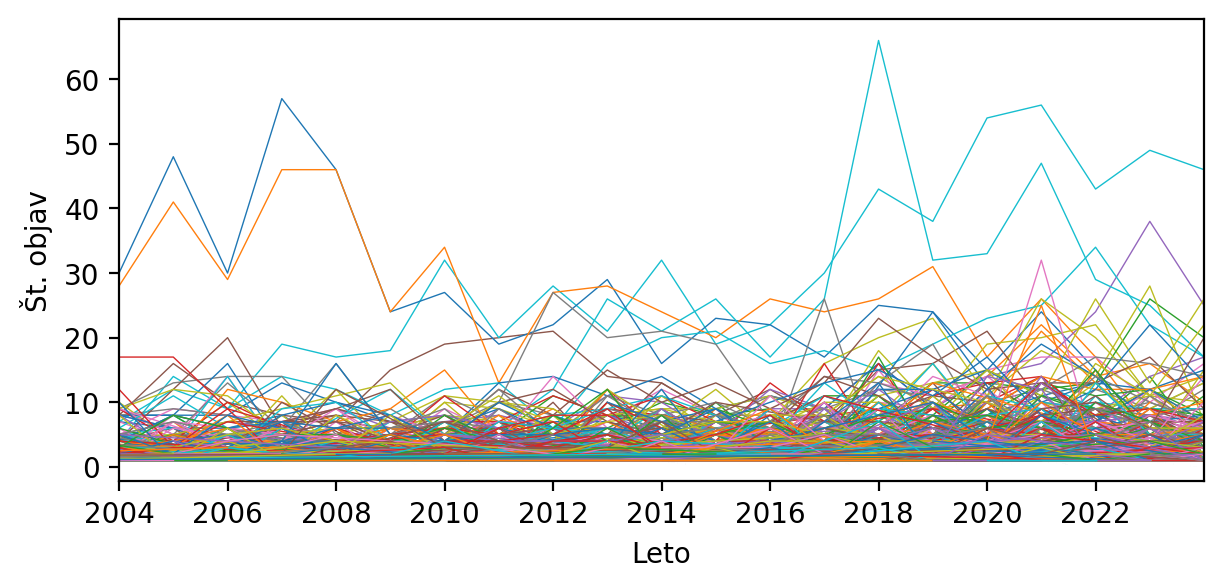

In [13]:
# plot author timelines
fig, ax = plt.subplots(figsize=(7, 3))
for author in author_timelines:
    ax.plot(list(author_timelines[author].keys()), list(author_timelines[author].values()), marker='', linestyle='-', linewidth=0.5, mfc = 'none', ms=3)
plt.xlabel('Leto')
plt.ylabel('Št. objav')
plt.xticks(np.arange(2004, 2024, 2));
plt.xlim(2004,2024)

In [ ]:
###### unique authors per year analysis ######

In [94]:
w_um = np.load("w_um.npy", allow_pickle=True)

In [220]:
authors_year = {}
for year in range(2004, 2024):
    authors_year[year] = []

for year in range(2004, 2024):
    for work in w_um:
        if work["publication_year"] == year:
            for author in work["authorships"]:
                if "institutions" in author.keys():
                    for institution in author["institutions"]:
                        if institution["display_name"] == "University of Maribor":
                            authors_year[year].append(author["author"]["display_name"])

                        

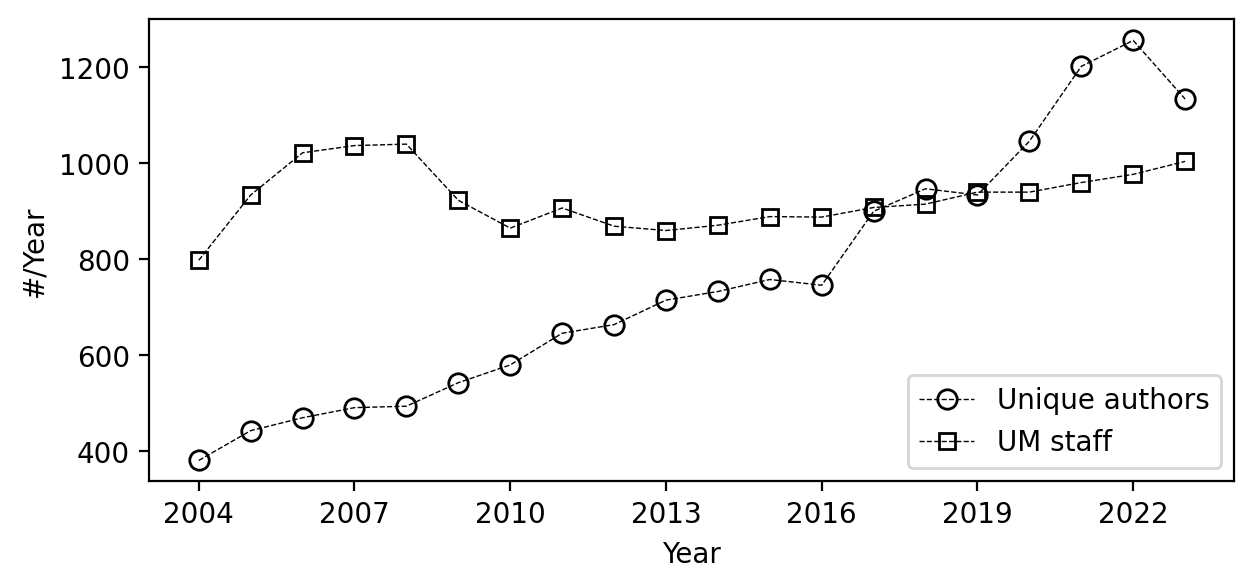

In [221]:
# plot unique authors per year
authors_year_unique = {k: len(set(v)) for k, v in authors_year.items()}
authors_year_unique = dict(sorted(authors_year_unique.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(authors_year_unique.keys()), list(authors_year_unique.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Year')
plt.ylabel('#/Year')
# add um_staff to plot
um_staff = {2004:798, 2005:934, 2006: 1022, 2007: 1037, 2008: 1040, 2009: 923, 2010: 865, 2011: 907, 2012: 869, 2013: 860,
            2014: 871, 2015: 889, 2016: 888, 2017: 908, 2018: 915, 2019: 940, 2020: 940, 2021: 960, 2022: 977, 2023: 1004}
plt.plot(list(um_staff.keys()), list(um_staff.values()), marker='s', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
# legend place lower right
plt.legend(["Unique authors", "UM staff"], loc='lower right')


In [23]:
um_skupina_H = {2005: 181, 2006: 240, 2007: 228, 2008: 234, 2009: 207, 2010: 238, 2011: 244, 2012: 210, 2013: 211, 2014: 175, 2015: 149, 
                2016: 159, 2017: 184, 2018: 219, 2019: 289, 2020: 289, 2021: 296, 2022: 262, 2023: 303}

Text(2010, 238, '')

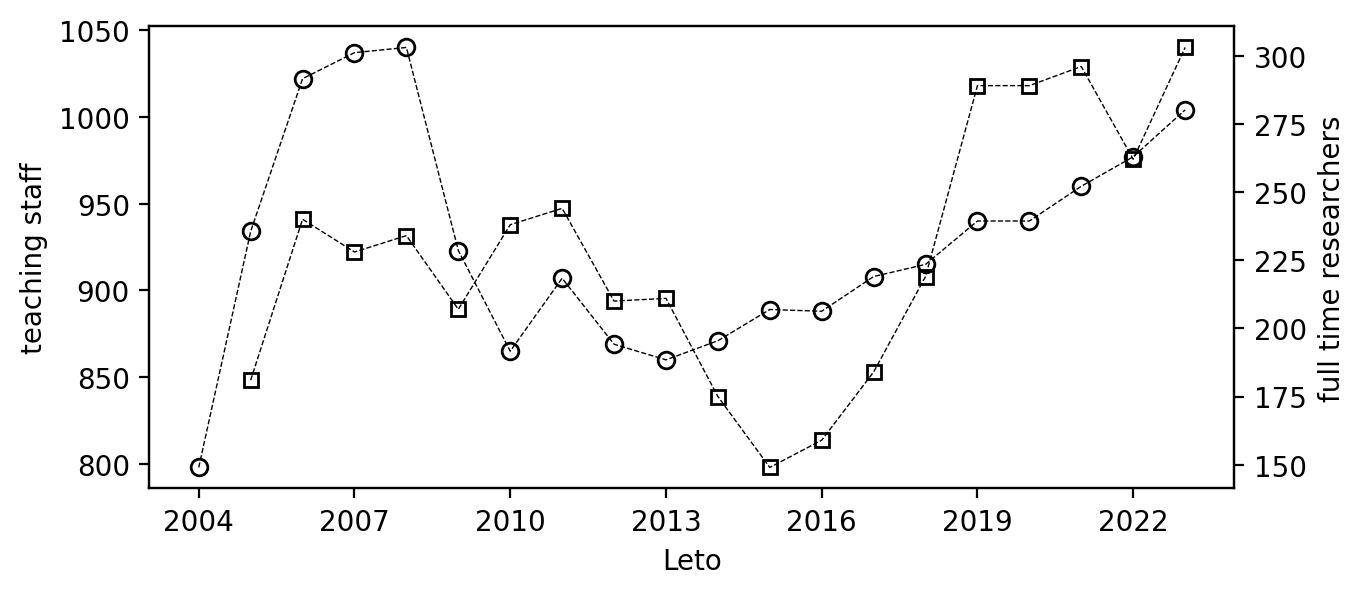

In [97]:
# plot um_staff and um_skupina_H from 2005 to 2023
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
ax1.plot(list(um_staff.keys()), list(um_staff.values()), marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=6)
ax2.plot(list(um_skupina_H.keys()), list(um_skupina_H.values()), marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
ax1.set_xlabel('Leto')
ax1.set_ylabel('teaching staff', color='black')
ax2.set_ylabel('full time researchers', color='black')
# add arrows indicating to which axis the points belong
ax1.annotate('', xy=(2010, 865), xytext=(2010, 865), arrowprops=dict(facecolor='black', shrink=0.05))
ax2.annotate('', xy=(2010, 238), xytext=(2010, 238), arrowprops=dict(facecolor='black', shrink=0.05))


#ax1.legend(["teaching staff"], loc='lower right')
#ax2.legend(["full time researchers"], loc='upper right')


In [98]:
# sum um_staff and um_skupina_H from 2005 to 2023 into um_research, should go from 2005 to 2023
um_research = {k: um_staff[k] + um_skupina_H[k] for k in um_skupina_H.keys()}

Text(0, 0.5, 'Št. zaposlenih')

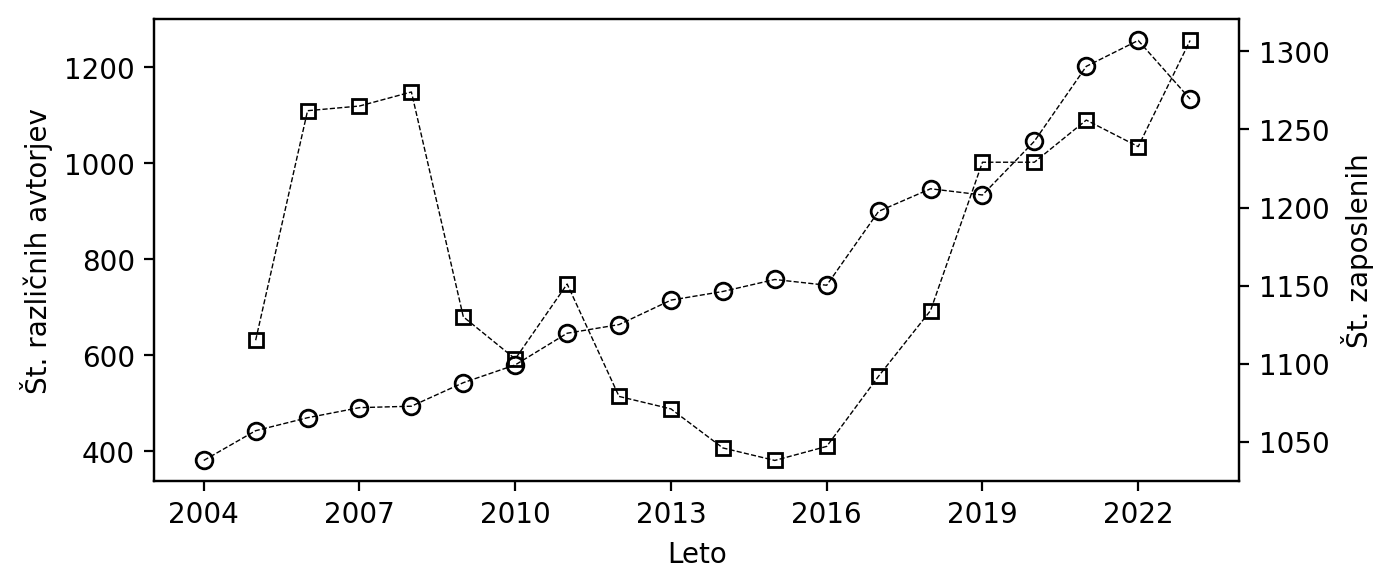

In [99]:
# plot unique authors per year vs um_staff per year
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
ax1.plot(list(authors_year_unique.keys()), list(authors_year_unique.values()), marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=6)
#ax2.plot(list(um_staff.keys()), list(um_staff.values()), marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# add um_research to plot
ax2.plot(list(um_research.keys()), list(um_research.values()), marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)

# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
ax1.set_xlabel('Leto')
ax1.set_ylabel('Št. različnih avtorjev', color='black')
ax2.set_ylabel('Št. zaposlenih', color='black')


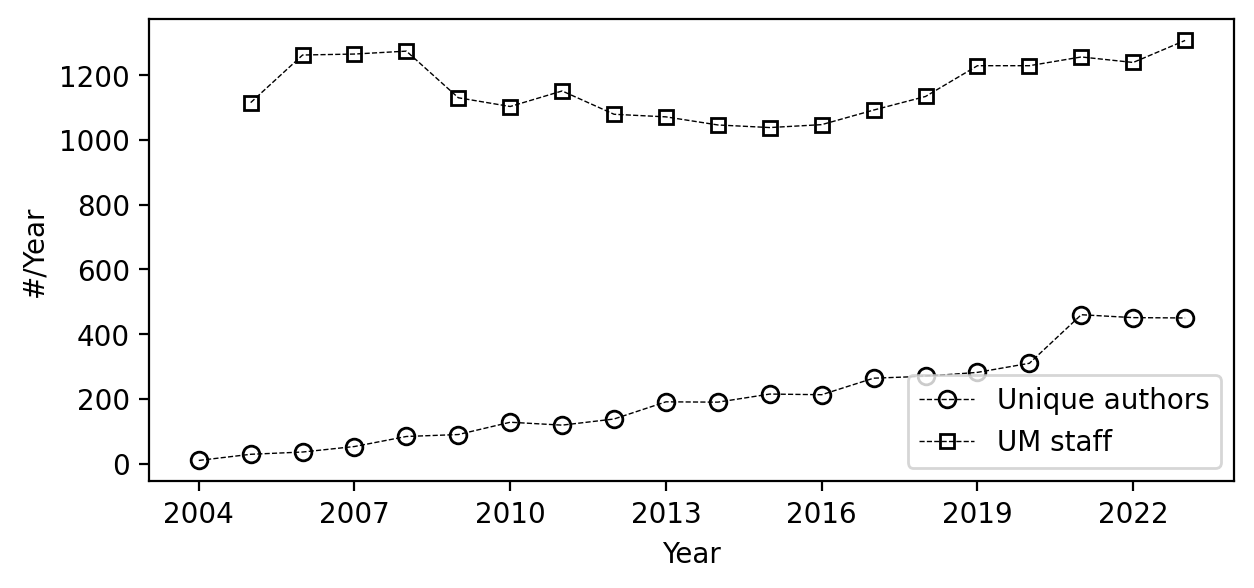

In [219]:
# plot unique authors per year
authors_year_unique = {k: len(set(v)) for k, v in authors_year.items()}
authors_year_unique = dict(sorted(authors_year_unique.items(), key=lambda item: item[0]))
plt.figure(figsize=(7, 3))
plt.plot(list(authors_year_unique.keys()), list(authors_year_unique.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
plt.plot(list(um_research.keys()), list(um_research.values()), marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));

plt.xlabel('Year')
plt.ylabel('#/Year')
# add um_staff to plot
um_staff = {2004:798, 2005:934, 2006: 1022, 2007: 1037, 2008: 1040, 2009: 923, 2010: 865, 2011: 907, 2012: 869, 2013: 860,
            2014: 871, 2015: 889, 2016: 888, 2017: 908, 2018: 915, 2019: 940, 2020: 940, 2021: 960, 2022: 977, 2023: 1004}
#plt.plot(list(um_staff.keys()), list(um_staff.values()), marker='s', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
# legend place lower right
plt.legend(["Unique authors", "UM staff"], loc='lower right')
plt.show()

In [ ]:
###### jacard and churn analysis ######

In [41]:
authors_year_sets = {}
for year in range(2004, 2024):
    authors_year_sets[year] = set(authors_year[year])

jaccard_per_year = {}
years = sorted(authors_year_sets.keys())

for i in range(len(years) - 1):
    y1 = years[i]
    y2 = years[i+1]
    A = authors_year_sets[y1]
    B = authors_year_sets[y2]
    
    intersection = A.intersection(B)
    union = A.union(B)
    
    jaccard_index = len(intersection) / len(union) if len(union) > 0 else 0
    jaccard_per_year[(y1, y2)] = jaccard_index

# Izpis
for (y1, y2), j_idx in jaccard_per_year.items():
    print(f"Jaccard med {y1} in {y2}: {j_idx:.3f}")


Jaccard med 2004 in 2005: 0.340
Jaccard med 2005 in 2006: 0.327
Jaccard med 2006 in 2007: 0.320
Jaccard med 2007 in 2008: 0.317
Jaccard med 2008 in 2009: 0.329
Jaccard med 2009 in 2010: 0.329
Jaccard med 2010 in 2011: 0.352
Jaccard med 2011 in 2012: 0.334
Jaccard med 2012 in 2013: 0.329
Jaccard med 2013 in 2014: 0.340
Jaccard med 2014 in 2015: 0.338
Jaccard med 2015 in 2016: 0.346
Jaccard med 2016 in 2017: 0.320
Jaccard med 2017 in 2018: 0.319
Jaccard med 2018 in 2019: 0.362
Jaccard med 2019 in 2020: 0.381
Jaccard med 2020 in 2021: 0.357
Jaccard med 2021 in 2022: 0.321
Jaccard med 2022 in 2023: 0.330


In [42]:
intersection_count = {}
for i in range(len(years) - 1):
    y1 = years[i]
    y2 = years[i+1]
    intersection_count[(y1, y2)] = len(authors_year_sets[y1].intersection(authors_year_sets[y2]))

for (y1, y2), count in intersection_count.items():
    print(f"Skupno avtorjev v {y1} in {y2}: {count}")


Skupno avtorjev v 2004 in 2005: 209
Skupno avtorjev v 2005 in 2006: 225
Skupno avtorjev v 2006 in 2007: 233
Skupno avtorjev v 2007 in 2008: 237
Skupno avtorjev v 2008 in 2009: 257
Skupno avtorjev v 2009 in 2010: 278
Skupno avtorjev v 2010 in 2011: 319
Skupno avtorjev v 2011 in 2012: 328
Skupno avtorjev v 2012 in 2013: 341
Skupno avtorjev v 2013 in 2014: 367
Skupno avtorjev v 2014 in 2015: 377
Skupno avtorjev v 2015 in 2016: 387
Skupno avtorjev v 2016 in 2017: 399
Skupno avtorjev v 2017 in 2018: 447
Skupno avtorjev v 2018 in 2019: 500
Skupno avtorjev v 2019 in 2020: 546
Skupno avtorjev v 2020 in 2021: 591
Skupno avtorjev v 2021 in 2022: 597
Skupno avtorjev v 2022 in 2023: 593


In [43]:
# 1) Zgradimo slovar: avtor -> seznam let, ko se je pojavil
author_years = {}

for year, authors in authors_year_sets.items():
    for a in authors:
        if a not in author_years:
            author_years[a] = []
        author_years[a].append(year)

# 2) Za vsakega avtorja preverimo največje število zaporednih let
core_3_count = 0
core_5_count = 0

for author, yrs in author_years.items():
    sorted_years = sorted(yrs)
    
    max_streak = 1
    current_streak = 1
    
    # Pregledamo zaporedne letnice
    for i in range(1, len(sorted_years)):
        if sorted_years[i] == sorted_years[i-1] + 1:
            current_streak += 1
        else:
            max_streak = max(max_streak, current_streak)
            current_streak = 1
    max_streak = max(max_streak, current_streak)
    
    # Preverimo, če ustreza "core" definiciji
    if max_streak >= 3:
        core_3_count += 1
    if max_streak >= 5:
        core_5_count += 1

print(f"Število avtorjev z vsaj 3 zaporednimi leti objav: {core_3_count}")
print(f"Število avtorjev z vsaj 5 zaporednimi leti objav: {core_5_count}")


Število avtorjev z vsaj 3 zaporednimi leti objav: 1047
Število avtorjev z vsaj 5 zaporednimi leti objav: 540


In [44]:
churn_per_year = {}
for i in range(len(years) - 1):
    y1 = years[i]
    y2 = years[i + 1]
    A = authors_year_sets[y1]
    B = authors_year_sets[y2]
    
    # Avtorji, ki so "izpadli" med y1 in y2
    churn_set = A.difference(B)
    
    churn_rate = len(churn_set) / len(A) if len(A) > 0 else 0
    churn_per_year[y1] = churn_rate

for y, c in churn_per_year.items():
    print(f"Churn iz leta {y} v {y+1}: {c:.2%}")


Churn iz leta 2004 v 2005: 45.14%
Churn iz leta 2005 v 2006: 49.21%
Churn iz leta 2006 v 2007: 50.43%
Churn iz leta 2007 v 2008: 51.73%
Churn iz leta 2008 v 2009: 47.98%
Churn iz leta 2009 v 2010: 48.80%
Churn iz leta 2010 v 2011: 45.00%
Churn iz leta 2011 v 2012: 49.23%
Churn iz leta 2012 v 2013: 48.64%
Churn iz leta 2013 v 2014: 48.67%
Churn iz leta 2014 v 2015: 48.57%
Churn iz leta 2015 v 2016: 48.94%
Churn iz leta 2016 v 2017: 46.51%
Churn iz leta 2017 v 2018: 50.33%
Churn iz leta 2018 v 2019: 47.20%
Churn iz leta 2019 v 2020: 41.54%
Churn iz leta 2020 v 2021: 43.50%
Churn iz leta 2021 v 2022: 50.33%
Churn iz leta 2022 v 2023: 52.79%


In [45]:
def get_5year_window_authors(start_year, authors_year_sets, window_size=5):
    # start_year, npr. 2004
    # window_size, npr. 5
    # Vrne množico avtorjev za obdobje start_year..(start_year + window_size - 1)
    combined = set()
    for y in range(start_year, start_year + window_size):
        if y in authors_year_sets:
            combined = combined.union(authors_year_sets[y])
    return combined


In [46]:
authors_5yr_window = {}
years_range = range(2004, 2024)  # 2004 do 2023
window_size = 5

for end_year in range(2004 + window_size - 1, 2024):
    start_year = end_year - (window_size - 1)
    authors_5yr_window[end_year] = get_5year_window_authors(start_year, authors_year_sets, window_size)


In [47]:
jaccard_5yr = {}
sorted_end_years = sorted(authors_5yr_window.keys())

for i in range(len(sorted_end_years) - 1):
    y1 = sorted_end_years[i]
    y2 = sorted_end_years[i+1]
    set1 = authors_5yr_window[y1]
    set2 = authors_5yr_window[y2]
    
    inters = set1.intersection(set2)
    union = set1.union(set2)
    jaccard = len(inters) / len(union) if len(union) else 0
    jaccard_5yr[(y1, y2)] = jaccard

for (y1, y2), j_idx in jaccard_5yr.items():
    print(f"5-letni Jaccard {y1}–{y2}: {j_idx:.3f}")


5-letni Jaccard 2008–2009: 0.813
5-letni Jaccard 2009–2010: 0.783
5-letni Jaccard 2010–2011: 0.801
5-letni Jaccard 2011–2012: 0.786
5-letni Jaccard 2012–2013: 0.790
5-letni Jaccard 2013–2014: 0.805
5-letni Jaccard 2014–2015: 0.808
5-letni Jaccard 2015–2016: 0.822
5-letni Jaccard 2016–2017: 0.756
5-letni Jaccard 2017–2018: 0.770
5-letni Jaccard 2018–2019: 0.809
5-letni Jaccard 2019–2020: 0.793
5-letni Jaccard 2020–2021: 0.776
5-letni Jaccard 2021–2022: 0.753
5-letni Jaccard 2022–2023: 0.807


In [48]:
churn_5yr = {}
for i in range(len(sorted_end_years) - 1):
    y1 = sorted_end_years[i]
    y2 = sorted_end_years[i+1]
    
    A = authors_5yr_window[y1]
    B = authors_5yr_window[y2]
    lost_authors = A.difference(B)
    
    churn_rate = len(lost_authors) / len(A) if len(A) else 0
    churn_5yr[(y1, y2)] = churn_rate

for (y1, y2), c_rate in churn_5yr.items():
    print(f"Churn 5-letno okno {y1}–{y2}: {c_rate:.2%}")


Churn 5-letno okno 2008–2009: 6.91%
Churn 5-letno okno 2009–2010: 9.68%
Churn 5-letno okno 2010–2011: 8.47%
Churn 5-letno okno 2011–2012: 9.02%
Churn 5-letno okno 2012–2013: 8.38%
Churn 5-letno okno 2013–2014: 8.43%
Churn 5-letno okno 2014–2015: 8.12%
Churn 5-letno okno 2015–2016: 8.94%
Churn 5-letno okno 2016–2017: 10.22%
Churn 5-letno okno 2017–2018: 9.93%
Churn 5-letno okno 2018–2019: 8.80%
Churn 5-letno okno 2019–2020: 8.98%
Churn 5-letno okno 2020–2021: 7.74%
Churn 5-letno okno 2021–2022: 10.96%
Churn 5-letno okno 2022–2023: 9.56%


In [248]:
############################################################
########## 5year window jadard and churn analysis ##########
############################################################
w_um = np.load("w_um.npy", allow_pickle=True)
authors_year = {}
for year in range(2004, 2024):
    authors_year[year] = []

for year in range(2004, 2024):
    for work in w_um:
        if work["publication_year"] == year:
            for author in work["authorships"]:
                if "institutions" in author.keys():
                    for institution in author["institutions"]:
                        if institution["display_name"] == "University of Maribor":
                            authors_year[year].append(author["author"]["display_name"])

authors_year_sets = {}
for year in range(2004, 2024):
    authors_year_sets[year] = set(authors_year[year])

authors_5yr_window = {}
years_range = range(2004, 2024)  # 2004 do 2023
window_size = 5

for end_year in range(2004 + window_size - 1, 2024):
    start_year = end_year - (window_size - 1)
    authors_5yr_window[end_year] = get_5year_window_authors(start_year, authors_year_sets, window_size)

jaccard_5yr = {}
sorted_end_years = sorted(authors_5yr_window.keys())

for i in range(len(sorted_end_years) - 1):
    y1 = sorted_end_years[i]
    y2 = sorted_end_years[i+1]
    set1 = authors_5yr_window[y1]
    set2 = authors_5yr_window[y2]
    
    inters = set1.intersection(set2)
    union = set1.union(set2)
    jaccard = len(inters) / len(union) if len(union) else 0
    jaccard_5yr[(y1, y2)] = jaccard

for (y1, y2), j_idx in jaccard_5yr.items():
    print(f"5-letni Jaccard {y1}–{y2}: {j_idx:.3f}")


churn_5yr = {}
for i in range(len(sorted_end_years) - 1):
    y1 = sorted_end_years[i]
    y2 = sorted_end_years[i+1]
    
    A = authors_5yr_window[y1]
    B = authors_5yr_window[y2]
    lost_authors = A.difference(B)
    
    churn_rate = len(lost_authors) / len(A) if len(A) else 0
    churn_5yr[(y1, y2)] = churn_rate

for (y1, y2), c_rate in churn_5yr.items():
    print(f"Churn 5-letno okno {y1}–{y2}: {c_rate:.2%}")



5-letni Jaccard 2008–2009: 0.813
5-letni Jaccard 2009–2010: 0.783
5-letni Jaccard 2010–2011: 0.801
5-letni Jaccard 2011–2012: 0.786
5-letni Jaccard 2012–2013: 0.790
5-letni Jaccard 2013–2014: 0.805
5-letni Jaccard 2014–2015: 0.808
5-letni Jaccard 2015–2016: 0.822
5-letni Jaccard 2016–2017: 0.756
5-letni Jaccard 2017–2018: 0.770
5-letni Jaccard 2018–2019: 0.809
5-letni Jaccard 2019–2020: 0.793
5-letni Jaccard 2020–2021: 0.776
5-letni Jaccard 2021–2022: 0.753
5-letni Jaccard 2022–2023: 0.807
Churn 5-letno okno 2008–2009: 6.91%
Churn 5-letno okno 2009–2010: 9.68%
Churn 5-letno okno 2010–2011: 8.47%
Churn 5-letno okno 2011–2012: 9.02%
Churn 5-letno okno 2012–2013: 8.38%
Churn 5-letno okno 2013–2014: 8.43%
Churn 5-letno okno 2014–2015: 8.12%
Churn 5-letno okno 2015–2016: 8.94%
Churn 5-letno okno 2016–2017: 10.22%
Churn 5-letno okno 2017–2018: 9.93%
Churn 5-letno okno 2018–2019: 8.80%
Churn 5-letno okno 2019–2020: 8.98%
Churn 5-letno okno 2020–2021: 7.74%
Churn 5-letno okno 2021–2022: 10.96%

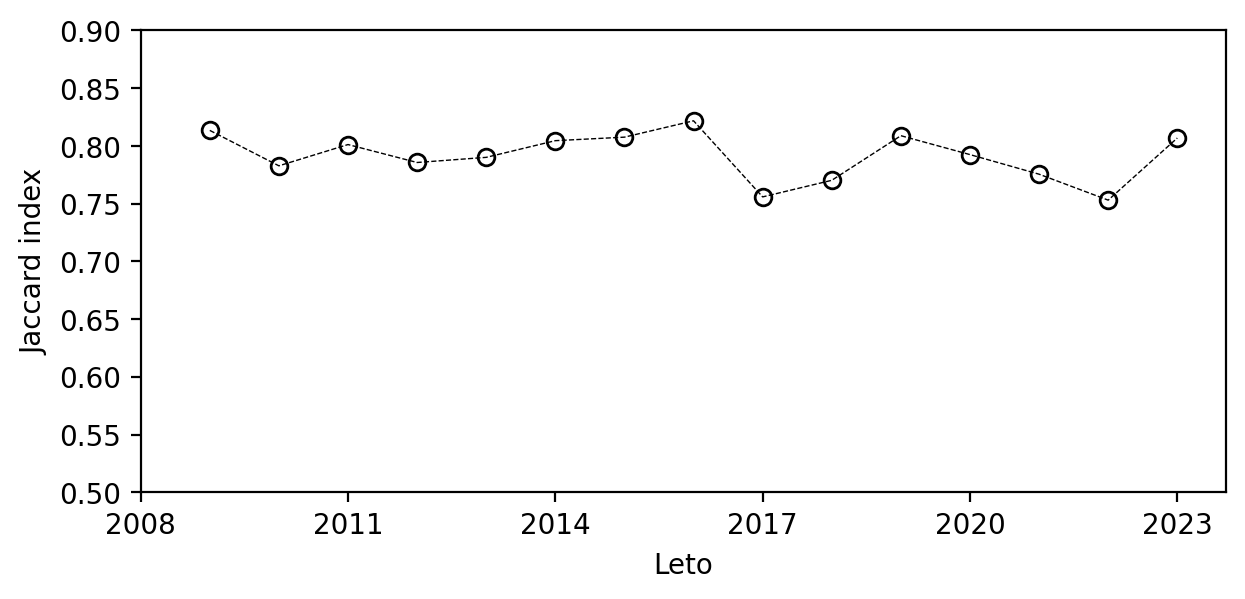

In [249]:
# take only the last year in the jaccard_5yr keys
years = [y2 for y1, y2 in jaccard_5yr.keys()]
jaccard_values = list(jaccard_5yr.values())
churn_values = list(churn_5yr.values())
# plot jaccard and churn values
fig, ax1 = plt.subplots(figsize=(7, 3))
#ax2 = ax1.twinx()
ax1.plot(years, jaccard_values, marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=6)
#ax2.plot(years, churn_values, marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# x ticks integer
plt.xticks(np.arange(2008, 2024, 3));
ax1.set_xlabel('Leto')
ax1.set_ylabel('Jaccard index', color='black')
ax2.set_ylabel('Churn rate', color='black')
plt.ylim(0.5, .9)
plt.show()

In [250]:
np.save('jaccard_um.npy', jaccard_values)

In [143]:
def jaccard_churn(works, institution_name, window_size=5):
############################################################
########## T-year window jaccard and churn analysis ##########
############################################################
#w_um = np.load("w_ul.npy", allow_pickle=True)
    authors_year = {}
    for year in range(2004, 2024):
        authors_year[year] = []

    for year in range(2004, 2024):
        for work in works:
            if work["publication_year"] == year:
                for author in work["authorships"]:
                    if "institutions" in author.keys():
                        for institution in author["institutions"]:
                            if institution["display_name"] == institution_name:
                                authors_year[year].append(author["author"]["display_name"])

    authors_year_sets = {}
    for year in range(2004, 2024):
        authors_year_sets[year] = set(authors_year[year])

    authors_5yr_window = {}
    years_range = range(2004, 2024)  # 2004 do 2023
    window_size = window_size

    for end_year in range(2004 + window_size - 1, 2024):
        start_year = end_year - (window_size - 1)
        authors_5yr_window[end_year] = get_5year_window_authors(start_year, authors_year_sets, window_size)

    jaccard_5yr = {}
    sorted_end_years = sorted(authors_5yr_window.keys())

    for i in range(len(sorted_end_years) - 1):
        y1 = sorted_end_years[i]
        y2 = sorted_end_years[i+1]
        set1 = authors_5yr_window[y1]
        set2 = authors_5yr_window[y2]
        
        inters = set1.intersection(set2)
        union = set1.union(set2)
        jaccard = len(inters) / len(union) if len(union) else 0
        jaccard_5yr[(y1, y2)] = jaccard

    #for (y1, y2), j_idx in jaccard_5yr.items():
    #    print(f"5-letni Jaccard {y1}–{y2}: {j_idx:.3f}")


    churn_5yr = {}
    for i in range(len(sorted_end_years) - 1):
        y1 = sorted_end_years[i]
        y2 = sorted_end_years[i+1]
        
        A = authors_5yr_window[y1]
        B = authors_5yr_window[y2]
        lost_authors = A.difference(B)
        
        churn_rate = len(lost_authors) / len(A) if len(A) else 0
        churn_5yr[(y1, y2)] = churn_rate

    #for (y1, y2), c_rate in churn_5yr.items():
    #    print(f"Churn 5-letno okno {y1}–{y2}: {c_rate:.2%}")#
    return jaccard_5yr, churn_5yr

In [150]:
works = np.load("w_um.npy", allow_pickle=True)
jaccard_um, churn_um = jaccard_churn(works, "University of Maribor", window_size=1)
works = np.load("w_ul.npy", allow_pickle=True)
jaccard_ul, churn_ul = jaccard_churn(works, "University of Ljubljana", window_size=1)   

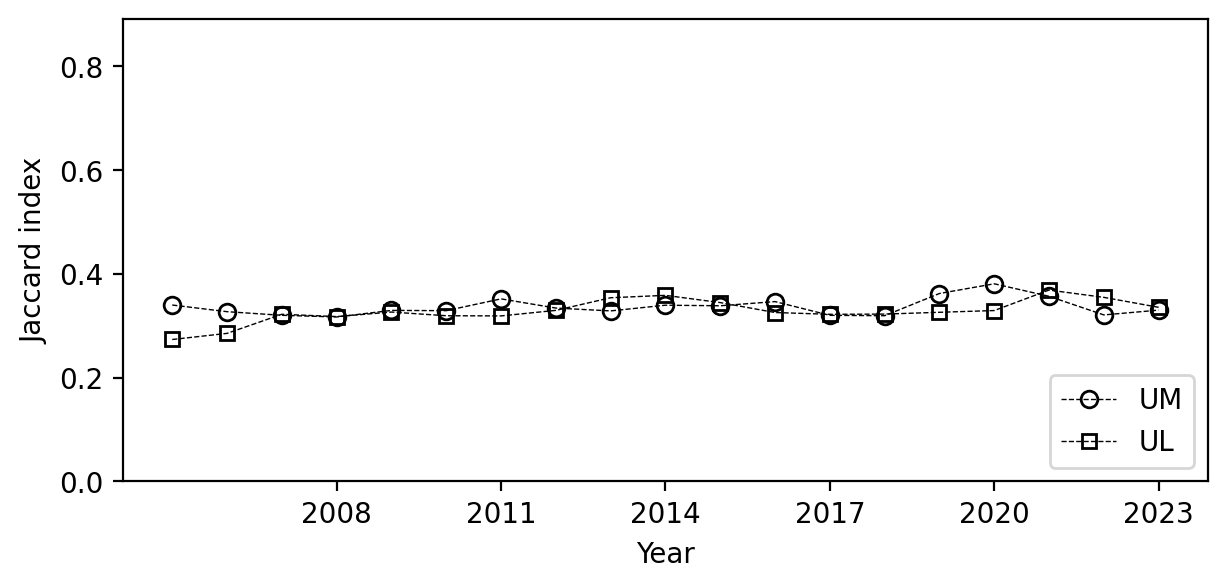

In [152]:
# plot jaccard_um and jaccard_ul values
years = [y2 for y1, y2 in jaccard_um.keys()]
jaccard_values_um = list(jaccard_um.values())
churn_values_um = list(churn_um.values())
jaccard_values_ul = list(jaccard_ul.values())
churn_values_ul = list(churn_ul.values())
fig, ax1 = plt.subplots(figsize=(7, 3))

ax1.plot(years, jaccard_values_um, marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=6)
ax1.plot(years, jaccard_values_ul, marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# x ticks integer
plt.xticks(np.arange(2008, 2024, 3));
ax1.set_xlabel('Year')
ax1.set_ylabel('Jaccard index', color='black')
plt.ylim(0.0, .89)
# legend place lower right
plt.legend(["UM", "UL"], loc='lower right')
plt.show()


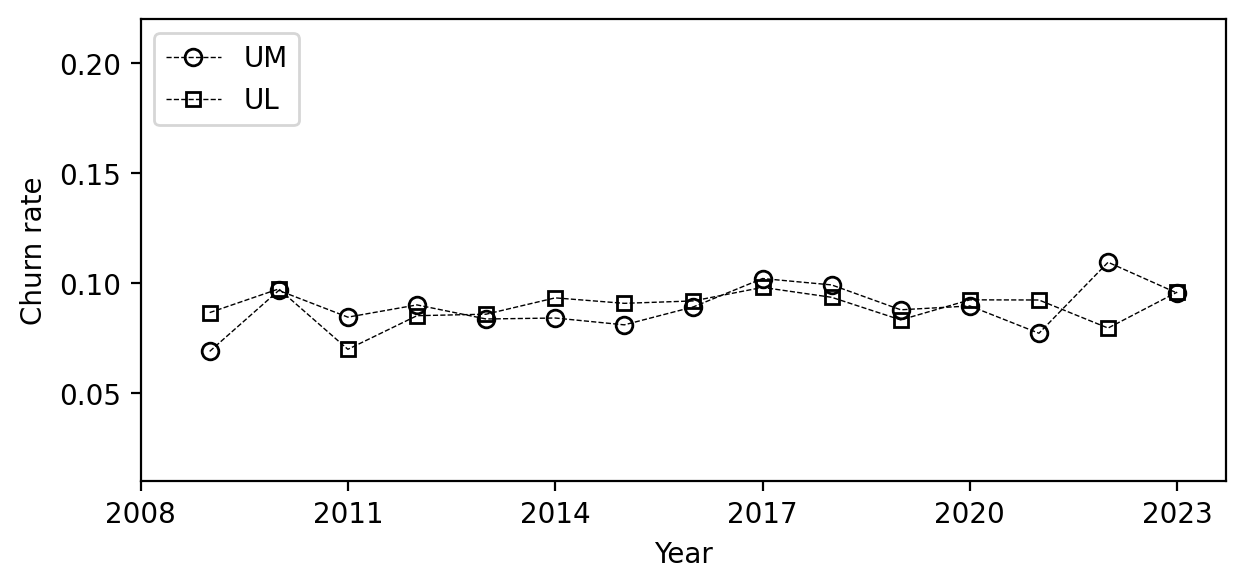

In [146]:
# plot churn_um and churn_ul values
fig, ax1 = plt.subplots(figsize=(7, 3))
ax1.plot(years, churn_values_um, marker='o', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=6)
ax1.plot(years, churn_values_ul, marker='s', color='black', linestyle='--', linewidth=.5, mfc = 'none', ms=5)
# x ticks integer
plt.xticks(np.arange(2008, 2024, 3));
ax1.set_xlabel('Year')
ax1.set_ylabel('Churn rate', color='black')
plt.ylim(0.01, .22)
# legend place upper left
plt.legend(["UM", "UL"], loc='upper left')
plt.show()

In [122]:
####### authors per year analysis #######

# um 'ror': 'https://ror.org/01d5jce07'
# ul 'ror': 'https://ror.org/05njb9z20'
# ijs 'ror': 'https://ror.org/05060sz93'
# zrc sazu https://ror.org/04zvj8c18
# up https://ror.org/05xefg082
# ung https://ror.org/00mw0tw28
# ki https://ror.org/050mac570

w_um = np.load("w_um.npy", allow_pickle=True)

authors_year = {}
for year in range(2004, 2024):
    authors_year[year] = []

for year in range(2004, 2024):
    for work in w_um:
        if work["publication_year"] == year:
            for author in work["authorships"]:
                if "institutions" in author.keys():
                    for institution in author["institutions"]:
                        if institution["ror"] == "https://ror.org/01d5jce07":
                            authors_year[year].append(author["author"]["display_name"])


authors_year_unique = {k: len(set(v)) for k, v in authors_year.items()}
authors_year_unique = dict(sorted(authors_year_unique.items(), key=lambda item: item[0]))

auth_unique_um = authors_year_unique

w_ul = np.load("w_ul.npy", allow_pickle=True)

authors_year = {}
for year in range(2004, 2024):
    authors_year[year] = []

for year in range(2004, 2024):
    for work in w_ul:
        if work["publication_year"] == year:
            for author in work["authorships"]:
                if "institutions" in author.keys():
                    for institution in author["institutions"]:
                        if institution["ror"] == "https://ror.org/05njb9z20":
                            authors_year[year].append(author["author"]["display_name"])


authors_year_unique = {k: len(set(v)) for k, v in authors_year.items()}
authors_year_unique = dict(sorted(authors_year_unique.items(), key=lambda item: item[0]))

auth_unique_ul = authors_year_unique

w_ijs = np.load("w_ijs.npy", allow_pickle=True)

authors_year = {}
for year in range(2004, 2024):
    authors_year[year] = []


for year in range(2004, 2024):
    for work in w_ijs:
        if work["publication_year"] == year:
            for author in work["authorships"]:
                if "institutions" in author.keys():
                    for institution in author["institutions"]:
                        if institution["ror"] == "https://ror.org/05060sz93":
                            authors_year[year].append(author["author"]["display_name"])

authors_year_unique = {k: len(set(v)) for k, v in authors_year.items()}
authors_year_unique = dict(sorted(authors_year_unique.items(), key=lambda item: item[0]))

auth_unique_ijs = authors_year_unique

w_zrc = np.load("w_zrc.npy", allow_pickle=True)

authors_year = {}
for year in range(2004, 2024):
    authors_year[year] = []

for year in range(2004, 2024):
    for work in w_zrc:
        if work["publication_year"] == year:
            for author in work["authorships"]:
                if "institutions" in author.keys():
                    for institution in author["institutions"]:
                        if institution["ror"] == "https://ror.org/04zvj8c18":
                            authors_year[year].append(author["author"]["display_name"])

authors_year_unique = {k: len(set(v)) for k, v in authors_year.items()}
authors_year_unique = dict(sorted(authors_year_unique.items(), key=lambda item: item[0]))

auth_unique_zrc = authors_year_unique

w_up = np.load("w_up.npy", allow_pickle=True)

authors_year = {}
for year in range(2004, 2024):
    authors_year[year] = []

for year in range(2004, 2024):
    for work in w_up:
        if work["publication_year"] == year:
            for author in work["authorships"]:
                if "institutions" in author.keys():
                    for institution in author["institutions"]:
                        if institution["ror"] == "https://ror.org/05xefg082":
                            authors_year[year].append(author["author"]["display_name"])

authors_year_unique = {k: len(set(v)) for k, v in authors_year.items()}
authors_year_unique = dict(sorted(authors_year_unique.items(), key=lambda item: item[0]))

auth_unique_up = authors_year_unique





(-400.0, 4000.0)

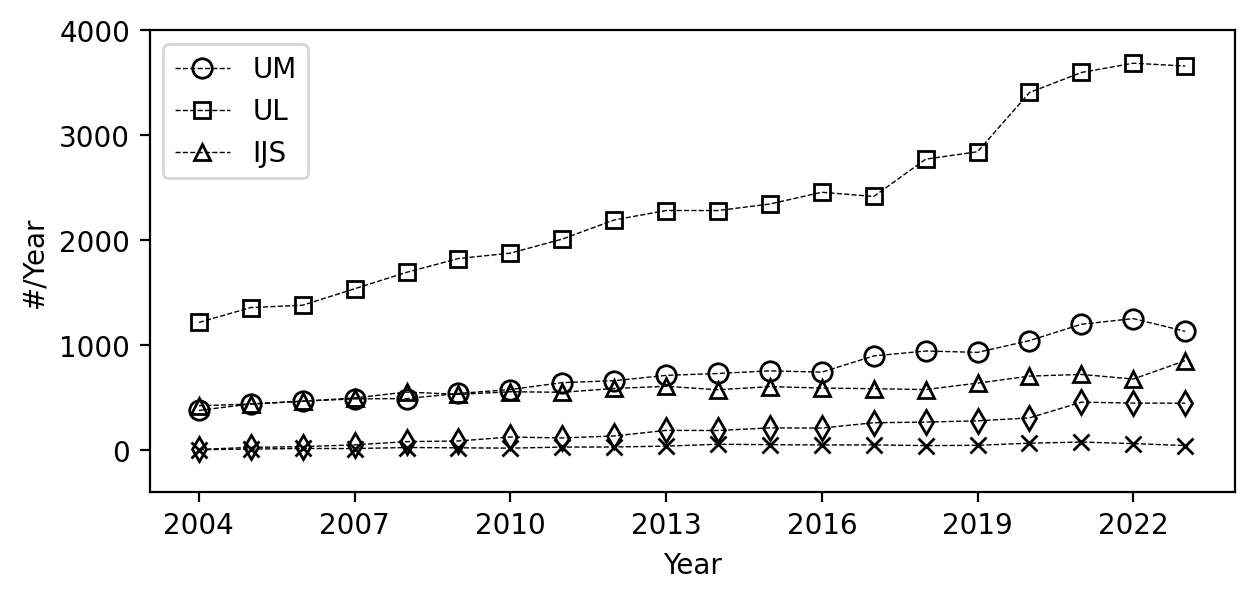

In [155]:
# plot unique authors per year

plt.figure(figsize=(7, 3))
plt.plot(list(auth_unique_um.keys()), list(auth_unique_um.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=7)
plt.plot(list(auth_unique_ul.keys()), list(auth_unique_ul.values()), marker='s', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
plt.plot(list(auth_unique_ijs.keys()), list(auth_unique_ijs.values()), marker='^', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
plt.plot(list(auth_unique_zrc.keys()), list(auth_unique_zrc.values()), marker='x', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
plt.plot(list(auth_unique_up.keys()), list(auth_unique_up.values()), marker='d', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
# x ticks integer
plt.xticks(np.arange(2004, 2024, 3));
plt.xlabel('Year')
plt.ylabel('#/Year')
# legend place lower right
plt.legend(["UM", "UL", "IJS"], loc='upper left')
plt.ylim(-400, 4000)


In [181]:
oecd = pd.read_csv("./OECD_SI_GERD_researchers.csv")

In [183]:
oecd.keys()

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'FREQ', 'Frequency of observation', 'MEASURE',
       'Measure', 'UNIT_MEASURE', 'Unit of measure', 'PRICE_BASE',
       'Price base', 'TRANSFORMATION', 'Transformation', 'TIME_PERIOD',
       'Time period', 'OBS_VALUE', 'Observation value', 'OBS_STATUS',
       'Observation status', 'OBS_STATUS_2', 'Observation status 2',
       'OBS_STATUS_3', 'Observation status 3', 'AUX_OBS_STATUS',
       'Aux observation status', 'CONF_STATUS', 'Confidentiality status',
       'UNIT_MULT', 'Unit multiplier', 'BASE_PER', 'Base year', 'DECIMALS',
       'Decimals'],
      dtype='object')

In [198]:
# show MEASURE and OBS_VALUE
oecd[['MEASURE','UNIT_MEASURE','TIME_PERIOD', 'OBS_VALUE','Decimals']]

,MEASURE,UNIT_MEASURE,TIME_PERIOD,OBS_VALUE,Decimals
0,G,USD_PPP_PS,2016,681.447581,Zero
1,G,USD_PPP_PS,2008,481.425852,Zero
2,G,USD_PPP_PS,2011,698.106914,Zero
3,G,USD_PPP_PS,2022,1082.485373,Zero
4,G,USD_PPP_PS,2019,871.461078,Zero
5,G,USD_PPP_PS,2018,759.076056,Zero
6,G,USD_PPP_PS,2004,311.853454,Zero
7,T_RS,FTE,2007,6250.000000,Zero
8,G,USD_PPP_PS,2015,694.523640,Zero
9,G,USD_PPP_PS,2014,730.288104,Zero


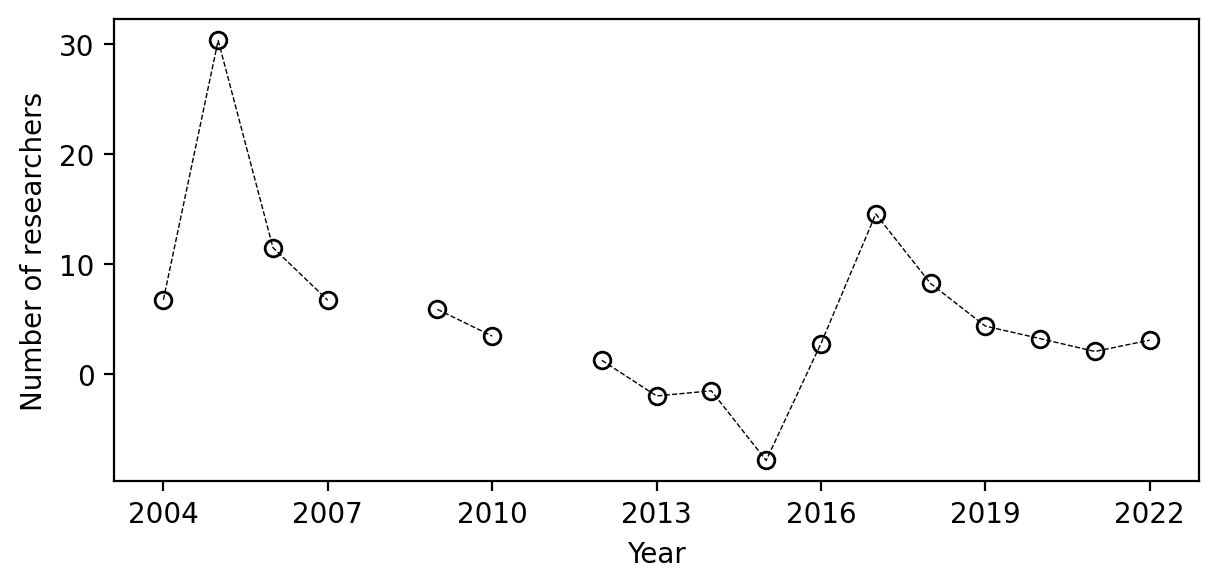

In [218]:
# plot OBS_VALUE vs TIME_PERIOD for Decimals = 'Zero' and UNIT_MEASURE = 'FTE'
oecd_fte = oecd[oecd['Decimals'] == 'One']
oecd_fte = oecd_fte[oecd_fte['UNIT_MEASURE'] == 'FTE']
# sort by TIME_PERIOD
oecd_fte = oecd_fte.sort_values(by='TIME_PERIOD')

plt.figure(figsize=(7, 3))
plt.plot(oecd_fte['TIME_PERIOD'], oecd_fte['OBS_VALUE'], marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
plt.xlabel('Year')
plt.ylabel('Number of researchers')
plt.xticks(np.arange(2004, 2023, 3));



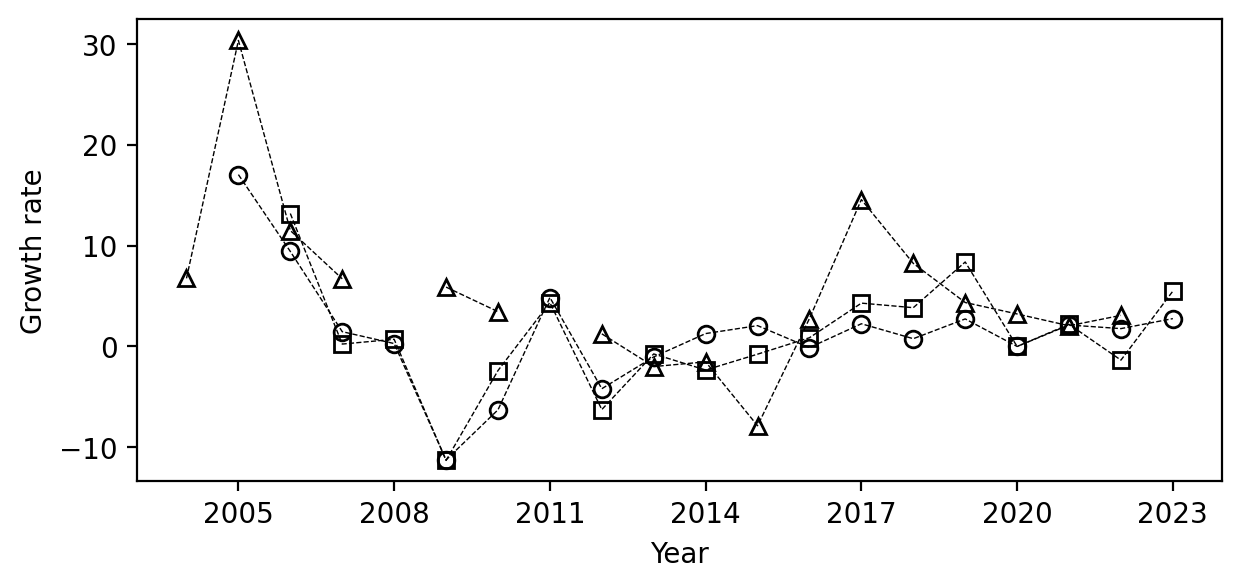

In [216]:
# plot um_staff and um_skupina_H values in growth percentage
um_staff = {2004:798, 2005:934, 2006: 1022, 2007: 1037, 2008: 1040, 2009: 923, 2010: 865, 2011: 907, 2012: 869, 2013: 860,
            2014: 871, 2015: 889, 2016: 888, 2017: 908, 2018: 915, 2019: 940, 2020: 940, 2021: 960, 2022: 977, 2023: 1004}

um_skupina_H = {2005: 181, 2006: 240, 2007: 228, 2008: 234, 2009: 207, 2010: 238, 2011: 244, 2012: 210, 2013: 211, 2014: 175, 2015: 149, 
                2016: 159, 2017: 184, 2018: 219, 2019: 289, 2020: 289, 2021: 296, 2022: 262, 2023: 303}

um_research = {k: um_staff[k] + um_skupina_H[k] for k in um_skupina_H.keys()}

um_staff_growth = {k: 100*(um_staff[k] - um_staff[k-1]) / um_staff[k-1] for k in range(2005, 2024)}
um_research_growth = {k: 100*(um_research[k] - um_research[k-1]) / um_research[k-1] for k in range(2006, 2024)}

plt.figure(figsize=(7, 3))
plt.plot(list(um_staff_growth.keys()), list(um_staff_growth.values()), marker='o', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
plt.plot(list(um_research_growth.keys()), list(um_research_growth.values()), marker='s', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
plt.plot(oecd_fte['TIME_PERIOD'], oecd_fte['OBS_VALUE'], marker='^', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)

plt.xlabel('Year')
plt.ylabel('Growth rate')
plt.xticks(np.arange(2005, 2024, 3));


In [222]:
# compute growth rate for authors_year_unique
authors_year_unique = {k: len(set(v)) for k, v in authors_year.items()}
authors_year_unique = dict(sorted(authors_year_unique.items(), key=lambda item: item[0]))

authors_year_unique_growth = {k: 100*(authors_year_unique[k] - authors_year_unique[k-1]) / authors_year_unique[k-1] for k in range(2005, 2024)}

(-19.0, 39.0)

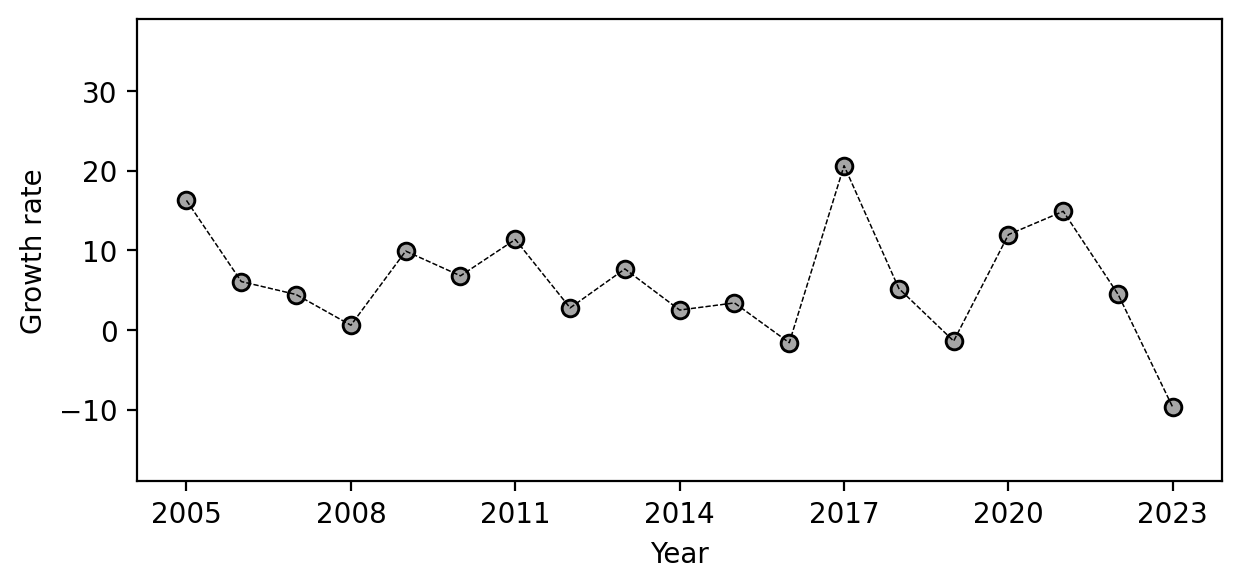

In [246]:
# plot authors_year_unique_growth
plt.figure(figsize=(7, 3))
plt.plot(list(authors_year_unique_growth.keys()), list(authors_year_unique_growth.values()), marker='o', color='black', linestyle='--', linewidth=0.5, ms=6, 
         label='Unique authors', alpha=0.35)
plt.plot(list(authors_year_unique_growth.keys()), list(authors_year_unique_growth.values()), marker='o', color='black', linestyle='--', linewidth=0.5, ms=6, 
         mfc = 'none')
#plt.plot(list(um_staff_growth.keys()), list(um_staff_growth.values()), marker='s', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)
#plt.plot(oecd_fte['TIME_PERIOD'], oecd_fte['OBS_VALUE'], marker='^', color='black', linestyle='--', linewidth=0.5, mfc = 'none', ms=6)

plt.xlabel('Year')
plt.ylabel('Growth rate')
plt.xticks(np.arange(2005, 2024, 3));
plt.ylim(-19, 39)
